<a href="https://colab.research.google.com/github/sravanivangala/sravani_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


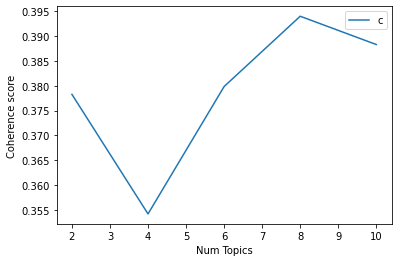

[0.37826419201886546, 0.354190991055383, 0.3798340137706946, 0.39398855858921406, 0.38829560106385735]
0.39398855858921406
8
[(0, '0.031*"brother" + 0.031*"drive" + 0.031*"mother"'), (1, '0.163*"good" + 0.163*"brocolli" + 0.163*"eat"'), (2, '0.031*"brother" + 0.031*"mother" + 0.031*"health"'), (3, '0.070*"well" + 0.070*"feel" + 0.070*"never"'), (4, '0.087*"drive" + 0.087*"mother" + 0.087*"brother"'), (5, '0.080*"suggest" + 0.080*"may" + 0.080*"pressur"'), (6, '0.031*"brother" + 0.031*"drive" + 0.031*"mother"'), (7, '0.212*"health" + 0.112*"say" + 0.112*"profession"')]


In [24]:
# Write your code here
#i couldn't use the data from previous exercise as i used different sentences
#for each feature extraction. so i took new data and made sure the data is 
#pre processed


import nltk
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel

nltk.download('stopwords')
#stopwords = stopwords.words('english')

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')
#get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

# Show graph
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=y, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=y, num_words=3))

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


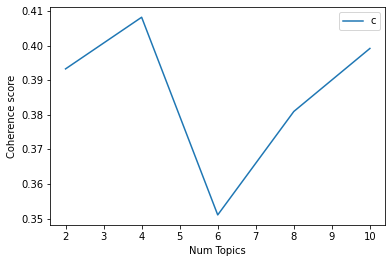

[0.39329495273531173, 0.408235990659379, 0.35104484264824476, 0.3809735432510212, 0.399207942342637]
0.408235990659379
4
[(0, '0.424*"good" + 0.424*"brocolli" + 0.350*"eat"'), (1, '0.376*"drive" + -0.349*"good" + -0.349*"brocolli"'), (2, '-0.534*"health" + -0.250*"caus" + -0.250*"expert"'), (3, '0.312*"around" + 0.312*"practic" + 0.312*"basebal"')]


In [18]:
# Write your code here


import nltk
from nltk.tokenize import RegexpTokenizer
#from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.corpus import stopwords

nltk.download('stopwords')
#stopwords = stopwords.words('english')

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')
#get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

#computing coherence values for different number of topics
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, 12,2,2)

# Show graph
import matplotlib.pyplot as plt
limit=12; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#finding the number of topics with high coherence score
n=max(coherence_values)
y=coherence_values.index(n)
y= (y+1)*2
print(coherence_values)
print(n)
print(y)

#LSAmodel generation
lsamodel = gensim.models.lsimodel.LsiModel(corpus, num_topics=y, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics=y, num_words=3))


## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

""" 
from the above implementation of the two models,
i think the LDA model offers more accuracy than the 
LSA model. because the LSA model cannot interpret 
multiple meanings of a word accurately. for example 
from the data used above, there is word 'drive'
which has multiple meanings in the data. one is to
drive a vehicle and other is to urge. this meaning has 
not been interpreted well in LSA model. drive good brocolli 
does not make a meaningful combination. while the LDA model has
interpreted the meanings better than LSA model. thus the topics
generated by LDA model make better sense than LSA model. 

